In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

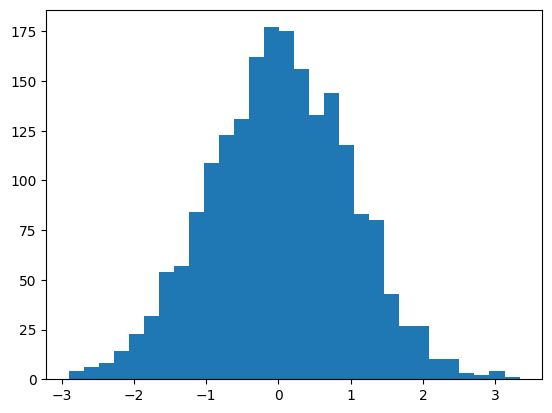

In [2]:
list = np.random.normal(size=2000)
plt.hist(list, bins=30)
plt.show()

# Para mas información

https://scikit-learn.org/stable/modules/density.html

# Estimación parametrica

 la estimación paramétrica se refiere a un método para estimar los parámetros de una distribución de probabilidad que se supone describe adecuadamente un conjunto de datos. Este método parte de la idea de que los datos que estás observando provienen de una distribución específica (como la normal, binomial, etc.) y tu objetivo es estimar los parámetros que definen esa distribución.

Suposición de un modelo paramétrico: Primero, asumes que tus datos siguen una distribución de probabilidad específica, como la normal, binomial, exponencial, etc. Esto se llama hacer una suposición paramétrica.

1. Recopilación de datos: Obtienes una muestra de datos que crees que sigue esta distribución.

2. Estimación de parámetros: Usas métodos estadísticos para estimar los parámetros de la distribución elegida. Los dos métodos más comunes son:

3. Máxima verosimilitud (Maximum Likelihood Estimation, MLE): Este método busca los valores de los parámetros que maximicen la probabilidad (verosimilitud) de observar los datos que has recogido.
Método de los momentos: Este método consiste en igualar los momentos teóricos de la distribución (como la media, la varianza, etc.) con los momentos observados en los datos y resolver para los parámetros.

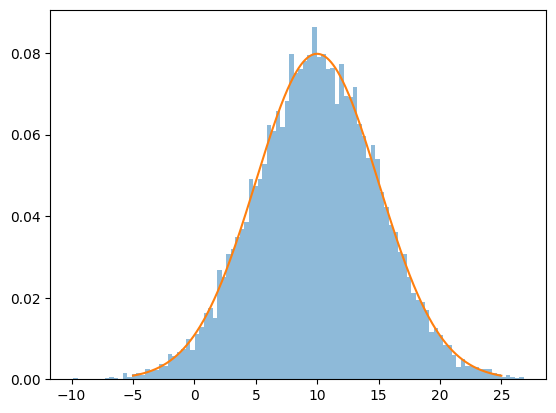

In [3]:
sample = np.random.normal(10,5,10000)
mean = np.mean(sample)
std = np.std(sample)

# Le damos a la distribución los paramtros de mis datos
x = np.arange(-5,25,0.01)
y = stats.norm.pdf(x, loc=mean, scale=std)
plt.hist(sample, alpha=0.5, density=True, bins= 100)
plt.plot(x,y)
plt.show()


# Estimación no parametrica

La estimación no paramétrica es un enfoque en estadística y probabilidad que se utiliza cuando no se asume que los datos siguen una distribución específica con un conjunto predefinido de parámetros. En lugar de ajustarse a un modelo de distribución como en la estimación paramétrica, los métodos no paramétricos permiten más flexibilidad al hacer estimaciones directamente a partir de los datos sin imponer suposiciones rígidas sobre la forma de la distribución.

### Estimación de la densidad de kernel (Kernel Density Estimation, KDE):

Este es un método para estimar la función de densidad de probabilidad de una variable aleatoria. En lugar de ajustarse a una forma predefinida de la distribución, KDE utiliza un "kernel" (una función suave, como una gaussiana) para suavizar la contribución de cada punto de datos en un vecindario, proporcionando una curva de densidad estimada que se ajusta a los datos.
Por ejemplo, si tienes datos sobre la altura de personas y no quieres asumir que sigue una distribución normal, puedes usar KDE para obtener una estimación suave y continua de la densidad de altura.
### Histogramas:

Los histogramas son un enfoque no paramétrico simple donde divides el rango de los datos en "bins" o intervalos, y luego cuentas cuántos datos caen en cada bin. Aunque es un método rudimentario, no hace suposiciones sobre la forma de la distribución, simplemente refleja la estructura de los datos.
### Pruebas estadísticas no paramétricas:

Estas pruebas no asumen una forma específica de la distribución. Ejemplos incluyen la prueba de Wilcoxon para comparar medianas y la prueba de Kruskal-Wallis para comparar múltiples grupos. Estas pruebas son útiles cuando los datos no cumplen con los supuestos de las pruebas paramétricas, como la normalidad.
### Estadísticas de orden:

Aquí se utilizan los valores ordenados de la muestra para hacer inferencias. Por ejemplo, la mediana es un estimador no paramétrico, ya que no asume nada sobre la distribución de los datos.

## Ejemplo KDE

In [4]:
from numpy import hstack
from sklearn.neighbors import KernelDensity
from numpy.random import normal
import matplotlib.pyplot as plt
#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack( (sample1, sample2))

In [5]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape(len(sample),1)
model.fit(sample)

KernelDensity(bandwidth=2)

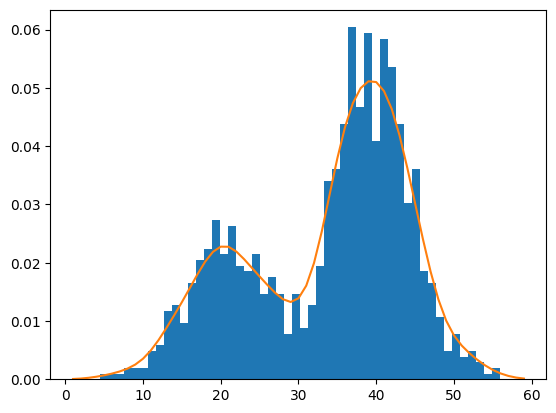

In [6]:
values = np.asarray( [value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples (values)
probabilities = np.exp(probabilities)

plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()